In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd

## Lecture 13

### Learning objectives

- Learn a few more **pandas** tricks.
- Learn how to make more complicated plots with **matplotlib**.
- Learn about the composition of the sun, solar system and Earth.

### More filtering tricks with pandas

We now turn to some plots of elemental abundances in the Sun and the Solar System.  I downloaded some data from Wikipedia (https://en.wikipedia.org/wiki/Abundances_of_the_elements_(data_page))
and processed them into a tab delimited file.  Let's use the `readlines()` method we learned about before to look at the top 10 lines in the file:

In [2]:
open('Datasets/ElementalAbundances/ElementalAbundances.txt').readlines()[0:10]

['AtomicNumber\tSymbol\tName\tSolar\tSystem\n',
 '01\tH\thydrogen\t28000.0\t28000.0\n',
 '02\tHe\thelium\t2700.0\t2700.0\n',
 '03\tLi\tlithium\t4e-07\t5.7e-05\n',
 '04\tBe\tberyllium\t4e-07\t7e-07\n',
 '05\tB\tboron\t1.1000000000000001e-05\t2.1000000000000002e-05\n',
 '06\tC\tcarbon\t10.0\t10.0\n',
 '07\tN\tnitrogen\t3.1\t3.1\n',
 '08\tO\toxygen\t24.0\t24.0\n',
 '09\tF\tfluorine\t0.001\t0.0008500000000000001\n']

The values are atomic mole fraction relative to Silicon so  Si is 1.

The Solar System elemental abundances are from: Thomas J. Ahrens (ed.), Global Earth Physics : A Handbook of Physical Constants, American Geophysical Union (1995). ISBN 0-87590-851-9 Composition of the Solar System, Planets, Meteorites, and Major Terrestrial Reservoirs, Horton E. Newsom. Tables 1, 14, 15.

The values for the Sun are from:  National Physical Laboratory, Kaye and Laby Tables of Physical & Chemical Constants (2005). Section 3.1.3, Abundances of the elements

We can read in this file with `pd.read_csv()` but  this is not a 'comma separated variable' file (that is what the `csv` stands for) but a tab delimited text file.  So, following the logic in Lecture 9 when we saved a file as a tab delimited format, we can   set the separation method to indicate tab spaces (`sep='\t'`) whe  reading in data.  And, we can (but don't have to ) tell pandas that the header is in the first line (0) as that is the default value for `header`. 

Note that there are many ways of delimiting files, for example with spaces. 
That is why in Lecture 9 we used `delim_whitespace=True` (which we could also do here - try it yourself).    

In [3]:
Abundances = pd.read_csv('Datasets/ElementalAbundances/ElementalAbundances.txt', sep='\t', header=0)
Abundances.head()

,AtomicNumber,Symbol,Name,Solar,System
0,1,H,hydrogen,2.800000e+04,2.800000e+04
1,2,He,helium,2.700000e+03,2.700000e+03
2,3,Li,lithium,4.000000e-07,5.700000e-05
3,4,Be,beryllium,4.000000e-07,7.000000e-07
4,5,B,boron,1.100000e-05,2.100000e-05


### More plotting techniques

We have successfully read in the file.  Now let's plot `"AtomicNumber"` versus the solar elemental abundances `Abundances.Solar` (or `"Solar"`).

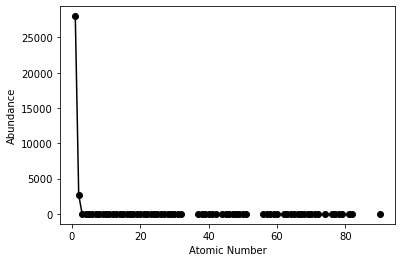

In [4]:
plt.plot(Abundances.AtomicNumber, Abundances.Solar, 'k-') # Plot with a black line
plt.plot(Abundances.AtomicNumber, Abundances.Solar, 'ko') # Put on some black dots
plt.xlabel('Atomic Number') # Label the x axis
plt.ylabel('Abundance'); # Label the y axis

Well that's odd - only the first two elements, hydrogen and helium, appear significant.  The Sun is primarily H and He, so this is expected, but it isn't a very informative plot!  We would like to see the other elements as well. We can do this by taking the logarithm of the abundances instead of the abundances.  One way to do this is to  use the **NumPy** function `np.log10()`. Note that `np.log()` returns the natural log, while `np.log10()` returns the base 10 log.  

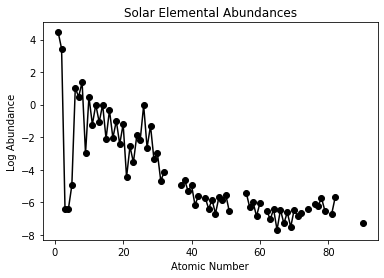

In [5]:
plt.plot(Abundances.AtomicNumber, np.log10(Abundances.Solar), 'k-')
plt.plot(Abundances.AtomicNumber, np.log10(Abundances.Solar), 'ko')
plt.xlabel('Atomic Number')
plt.ylabel('Log Abundance')
plt.title('Solar Elemental Abundances');

That's better.  While we are at it, there is another way to do this. We can set the y-scale to be a log, instead: 

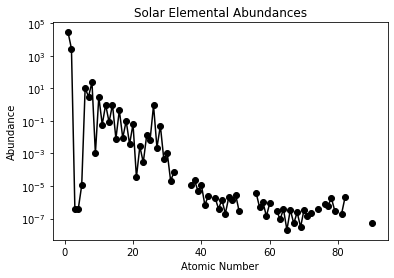

In [6]:
plt.semilogy(Abundances.AtomicNumber, Abundances.Solar, 'k-')
plt.semilogy(Abundances.AtomicNumber, Abundances.Solar, 'ko')
plt.xlabel('Atomic Number')
plt.ylabel('Abundance')
plt.title('Solar Elemental Abundances');

Let's keep improving this plot. We could place the symbols above the points. To do this, we will convert the `Series` `"AtomicNumber"` to a `list`, go through it with a `for` loop, and then plot each symbol  above the dot by using our old frient `plt.text()` from Lecture 9.  

To convert from a pandas `Series` to a `list`, we use the method `Series.tolist()` as we learned in Lecture 9.

In [7]:
print(Abundances.AtomicNumber.tolist()) # Convert Series to list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]


Now let's export the atomic symbols solar abundances to lists as well.

In [8]:
syms = Abundances.Symbol.tolist() # List of atomic symbols
print(syms)
Xs = Abundances.AtomicNumber.tolist() # List of atomic numbers
print(Xs)
Ys = Abundances.Solar.tolist() # List of solar abundances
print(Ys)


['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
[28000.0, 2700.0, 4e-07, 4e-07, 1.1e-05, 10.0, 3.1, 24.0, 0.001, 3.0, 0.06, 1.0, 

As we saw from last lecture, we can use the pandas method `DataFrame.dropna()` to get rid of the `nan`s.

In [9]:
Solar = Abundances.dropna(subset=['Solar']) # Drop all the records with blank abundances
print(Solar.Solar.tolist())

[28000.0, 2700.0, 4e-07, 4e-07, 1.1e-05, 10.0, 3.1, 24.0, 0.001, 3.0, 0.06, 1.0, 0.083, 1.0, 0.008, 0.45, 0.009000000000000001, 0.1, 0.0037, 0.064, 3.5000000000000004e-05, 0.0027, 0.00028, 0.013, 0.006900000000000001, 0.9, 0.0023, 0.05, 0.00045, 0.0011, 2.1e-05, 7.2e-05, 1.1e-05, 2.2000000000000006e-05, 4.9000000000000005e-06, 1.12e-05, 7e-07, 2.3e-06, 1.9e-06, 4e-07, 1.4e-06, 2e-07, 2e-06, 1.3e-06, 3e-06, 3e-07, 3.8e-06, 5e-07, 1e-06, 1.3999999999999998e-07, 9.000000000000001e-07, 3e-07, 9e-08, 3.7e-07, 2e-08, 3.5e-07, 5e-08, 2.4e-07, 3.0000000000000004e-08, 3.4e-07, 1.5e-07, 2.1e-07, 3.6e-07, 8e-07, 6e-07, 1.8000000000000001e-06, 3e-07, 2e-07, 2e-06, 5e-08]


Now we have to re-generate our lists from the filtered `DataFrame` `Solar`.

In [10]:
syms = Solar.Symbol.tolist() # Get the symbols exported to a list
Xs = Solar.AtomicNumber.tolist()
Ys = np.log10(Solar.Solar).tolist() # Don't forget to take the log value!

**TIP:** Another solution for getting rid of `nan`s would be replace them with zeros and then filter with the condition `!= 0` (remembering from Lecture 4 that "not equal to" is `!=` in Python.

To replace `nan`s  with a number, we  can use the `DataFrame.fillna()` method which does just that.

Now that we have rid ourselves of the empty values, we can label the points with  the list of symbols using the `plt.text()` function.  

We can tell `plt.text()` that we want the vertical alignment (`va`) of the data point to be on the bottom (`va = 'bottom'`) and we want to center the horizontal alignment (`ha = 'center'`).  
Here's how it goes. 

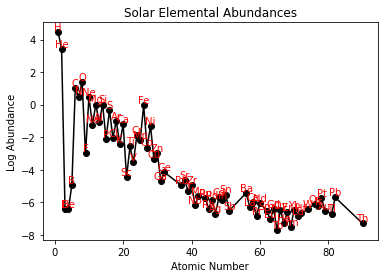

In [11]:
# Do the usual 
plt.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'k-')
plt.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'ko')
plt.xlabel('Atomic Number')
plt.ylabel('Log Abundance')
plt.title('Solar Elemental Abundances');
# Now decorate the plot with symbol names
for k in range(len(syms)): # walk through the syms list
    # Here's how you do the notes:
    plt.text(Xs[k], Ys[k], syms[k], va='bottom', ha='center', color='red') 

Close - but the text labels are too close to the data points, so let's "scootch" them up. We can also rotate them as we did in Lecture 9. We can make the plot a bit bigger for clarity.   Finally, we can set the fontsize using another keyword argument: 

Also, it is now time learn about `plt.figure()`.  This command creates a `figure` instance that has many useful  methods, among them the ability to change the dimensions of the plot.  This is done by passing a tuple with width and height as a parameter.

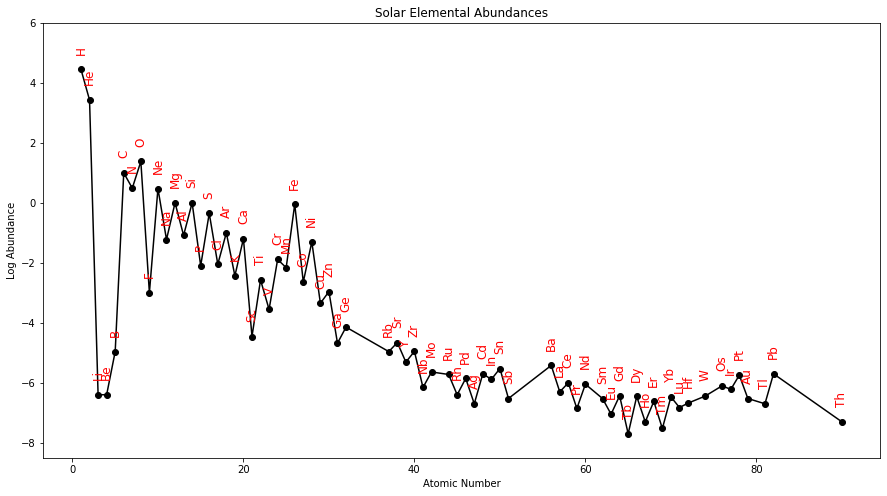

In [12]:
plt.figure(figsize=(15, 8))
plt.ylim(-8.5, 6)
plt.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'k-')
plt.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'ko')
plt.xlabel('Atomic Number')
plt.ylabel('Log Abundance')
plt.title('Solar Elemental Abundances')
scootch = 0.5
for k in range(len(syms)):
    plt.text(Xs[k], Ys[k]+scootch, syms[k], va='bottom', ha='center', color='red', rotation=90, fontsize=12)

Writing the labels above the points is one way to include the symbols. A different solution would be to write the labels on the X axis.  We do that with `plt.xticks()`. Setting the _rotation_ keyword to 90 puts the tick labels on sideways (similar to how we did it for `plt.text()`).  


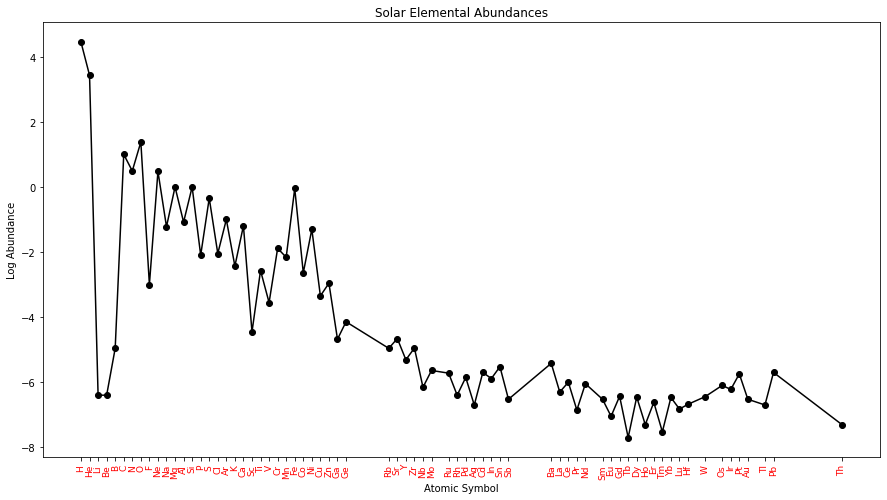

In [13]:
plt.figure(figsize=(15, 8))
plt.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'k-')
plt.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'ko')
plt.xlabel('Atomic Symbol')
plt.ylabel('Log Abundance')
plt.title('Solar Elemental Abundances')
plt.xticks(Xs, syms, rotation=90, fontsize=9, color='red'); # See how we rotate the xticks

Now let's look at the Solar System Abundances. We'll apply the same strategy.

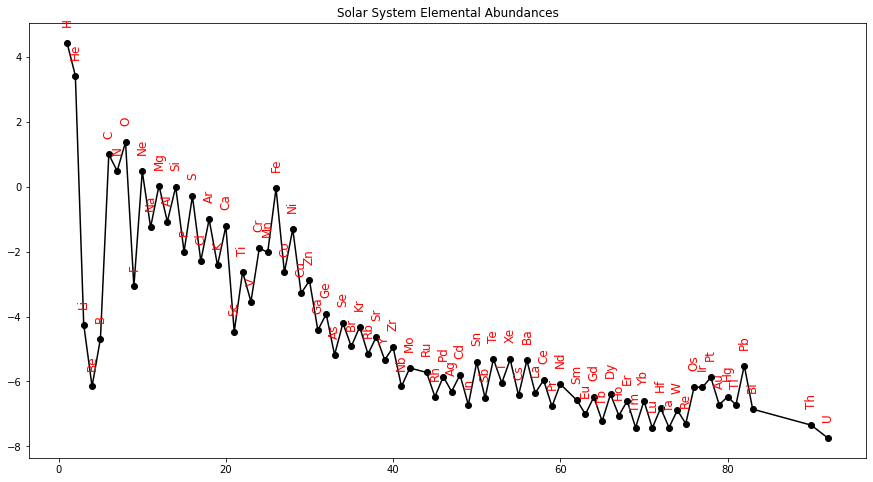

In [14]:
plt.figure(figsize=(15, 8))
System = Abundances.dropna(subset=['System'])
syms = System.Symbol.tolist()
Xs = System.AtomicNumber.values.tolist()
Ys = np.log10(System.System).tolist() # Don't forget to take the log value!
plt.plot(Xs, Ys, 'k-')
plt.plot(Xs, Ys, 'ko')
plt.title('Solar System Elemental Abundances')
scootch = 0.5
for k in range(len(syms)):
    plt.text(Xs[k], Ys[k]+scootch, syms[k], va='bottom', ha='center', color='red', rotation=90, fontsize=12)

Back to our elemental abundances, we'll take a look at one final example - the Earth's crust. You can find the data in: `Datasets/ElementalAbundances/CrustalAbundances.txt`.

Let's take a peek:

In [15]:
open('Datasets/ElementalAbundances/CrustalAbundances.txt').readlines()[0:10]

['AtomicNumber\tSymbol\tName\tCrust\tSiNormalized\n',
 '1\tH\thydrogen\t0.0014\t0.004964539\n',
 '2\tHe\thelium\t8.00E-09\t2.84E-08\n',
 '3\tLi\tlithium\t2.00E-05\t7.09E-05\n',
 '4\tBe\tberyllium\t2.80E-06\t9.93E-06\n',
 '5\tB\tboron\t1.00E-05\t3.55E-05\n',
 '6\tC\tcarbon\t0.0002\t0.00070922\n',
 '7\tN\tnitrogen\t1.90E-05\t6.74E-05\n',
 '8\tO\toxygen\t0.461\t1.634751773\n',
 '9\tF\tfluorine\t0.000585\t0.002074468\n']

And read, filter and plot   as before.

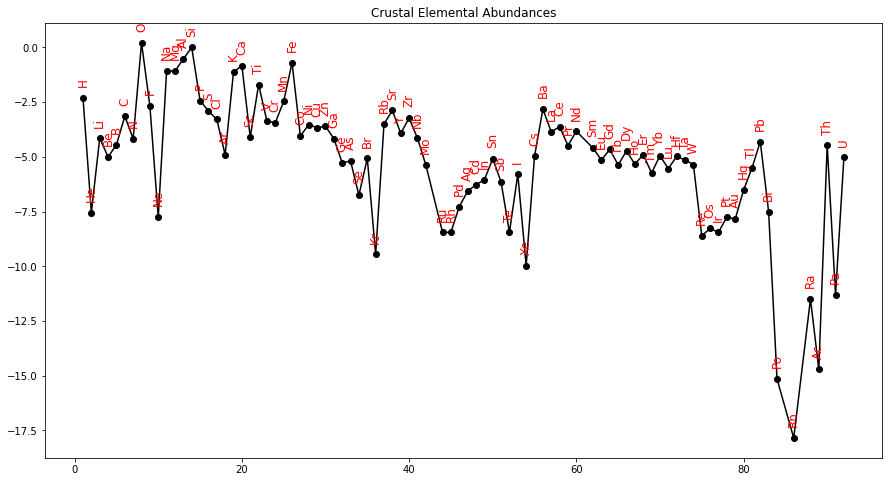

In [16]:
plt.figure(figsize=(15, 8))
CrustalAbundances = pd.read_csv('Datasets/ElementalAbundances/CrustalAbundances.txt',\
                              sep='\t', header=0) # Eead in the data
Crust = CrustalAbundances.dropna(subset=['SiNormalized']) # Drop the blanks
syms = Crust.Symbol.tolist() # Export the Symbol Series to syms
Xs = Crust.AtomicNumber.tolist()
Ys = np.log10(Crust.SiNormalized).tolist() # Don't forget to take the log value!
plt.plot(Xs, Ys, 'k-')
plt.plot(Xs, Ys, 'ko')
plt.title('Crustal Elemental Abundances')
scootch = 0.5 # pad the Y axis with scootch
for k in range(len(syms)):
    plt.text(Xs[k], Ys[k]+scootch, syms[k], va='bottom', ha='center', color='red', rotation=90, fontsize=12)

Wow! that looks different!    Where did all the Hydrogen and Helium go?  

To get a better comparison among the resevoirs, it would be handy to plot all three images on one figure.  There are many ways to accomplish this, for example making a stacked plot with the figures on top of each other, or three separate figures side-by-side.  Here we want three figures stacked vertically.  



Up to now we have just used `plt.figure()` to adjust the size of the default plot. But there is a lot more to a `plt.figure()` instance that we can use. To benefit from that, we make a figure instance called `fig` like so:  

In [17]:
fig = plt.figure(1, (5, 15)) # Figure instance

<Figure size 360x1080 with 0 Axes>

The `fig` instance has many methods.  One of these is `fig.add_subplot(row, column, plot_number)`.  

In this case, we want 3 rows in one column and we will add subplots in order (1-3).   

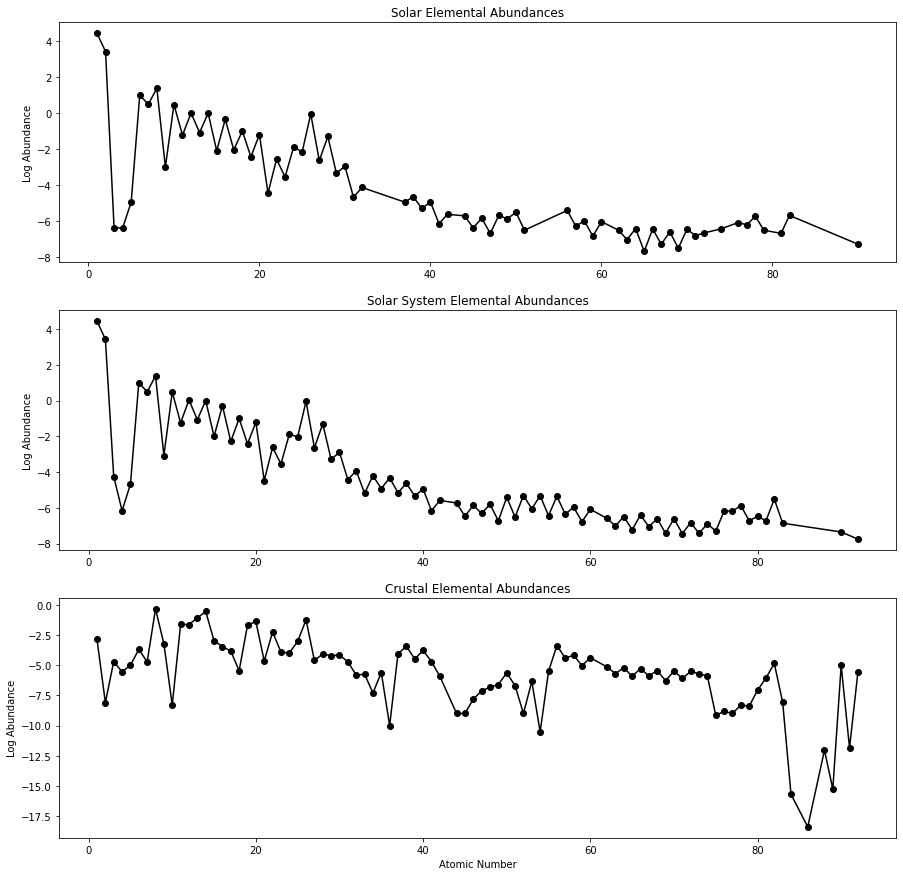

In [18]:
fig = plt.figure(1, (15, 15)) # Figure instance
fig.add_subplot(3, 1, 1) # The 3,1,1 means three rows, one column, and this is the first plot. 
plt.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'k-')
plt.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'ko')
plt.title("Solar Elemental Abundances")
plt.ylabel('Log Abundance')
fig.add_subplot(3, 1, 2) # This makes the second plot of three in one column
plt.plot(System.AtomicNumber, np.log10(System.System), 'k-')
plt.plot(System.AtomicNumber, np.log10(System.System), 'ko')
plt.title("Solar System Elemental Abundances")
plt.ylabel('Log Abundance')
fig.add_subplot(3, 1, 3) # And here comes the third plot.  
plt.plot(Crust.AtomicNumber, np.log10(Crust.Crust), 'k-')
plt.plot(Crust.AtomicNumber, np.log10(Crust.Crust), 'ko')
plt.title("Crustal Elemental Abundances")
plt.ylabel('Log Abundance')
plt.xlabel('Atomic Number'); # The xlabel comes here because the 3rd plot is the lowest


Other ways of setting up plots are possible and we will learn about some of them in later lectures.  If you are interested, see: http://matplotlib.org/api/pyplot_api.html.  



How else can we represent the crustal abundance data? Some folks love pie charts.  We can create a pie chart of the most abundant elements in the crust. To do this, we should probably  filter for the most abundant elements.   

So we'll begin by sorting the Crustal abundances into descending order. Remember from last lecture that we can use `DataFrame.sort_values()` to do this.

In [19]:
Crust.sort_values(by="Crust", ascending=False).head(14) # the head method gives us the top 14.

,AtomicNumber,Symbol,Name,Crust,SiNormalized
7,8,O,oxygen,0.461000,1.634752
13,14,Si,silicon,0.282000,1.000000
12,13,Al,aluminium,0.082300,0.291844
25,26,Fe,iron,0.056300,0.199645
19,20,Ca,calcium,0.041500,0.147163
10,11,Na,sodium,0.023600,0.083688
11,12,Mg,magnesium,0.023300,0.082624
18,19,K,potassium,0.020900,0.074113
21,22,Ti,titanium,0.005650,0.020035
0,1,H,hydrogen,0.001400,0.004965


Here we see that abundances less than about 1% are trivial, so let's filter `Crust` for values > 0.01.

In [20]:
Top = Crust[Crust.Crust > 0.01] # This takes all the values with Crust > 0.01
Top

,AtomicNumber,Symbol,Name,Crust,SiNormalized
7,8,O,oxygen,0.4610,1.634752
10,11,Na,sodium,0.0236,0.083688
11,12,Mg,magnesium,0.0233,0.082624
12,13,Al,aluminium,0.0823,0.291844
13,14,Si,silicon,0.2820,1.000000
18,19,K,potassium,0.0209,0.074113
19,20,Ca,calcium,0.0415,0.147163
25,26,Fe,iron,0.0563,0.199645


And now, drum roll please, for the pie chart. We can use `plt.pie()` to make the chart.  It has a keyword argument `labels=` which takes a list. This  allows us to label all the slices with a list of the symbols as shown here:

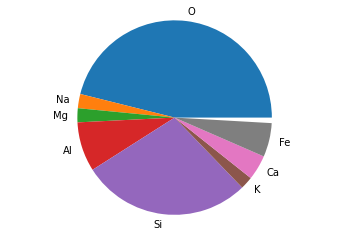

In [21]:
plt.pie(Top.Crust, labels=Top.Symbol.tolist()) # See the labels trick?  
plt.axis('equal'); # For some reason the pie is not round by default. This makes it round

But there is a slice out of our pie! This is because after removing the 'trivial' elements, they no longer  sum to 1.  Let's renormalize them.  To do that, we must first sum up all the values, then divide them all by the sum.  

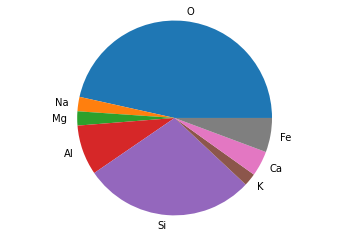

In [22]:
total = Top.Crust.sum() # The sum() method takes the sum of the Series - duh. 
Normalized = Top.Crust/total # Makes a Series that is normalized by the sum
syms = Top.Symbol.tolist()
plt.pie(Normalized, labels=syms)
plt.axis('equal');

Some people love pie charts while others like bar charts better.  So let's look at the data  as a bar chart. 

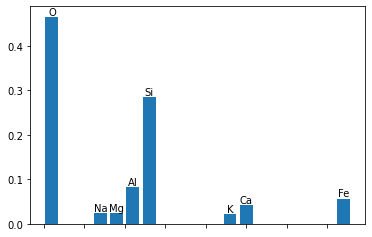

In [23]:
nums = Top.AtomicNumber.tolist() # Get a list of Atomic Numbers
plt.bar(nums, Normalized) # This makes the bar chart
plt.xticks(visible=False) # HA!  we can turn the x tick labels off!

for k in range(len(syms)): # And label the bars this way instead
    plt.text(nums[k] ,Normalized.tolist()[k], syms[k], va='bottom', ha='center')
# Notice how we had to turn the Series Normalized into a list for this

What if we wanted to show the pie chart and the line plot on the same chart? Subplots are nice, but they don't work well if you want to use a more unconventional layout. To do this, we can use a handy matplotlib plot type called `GridSpec`. This allows us to put plots wherever we want within a box.

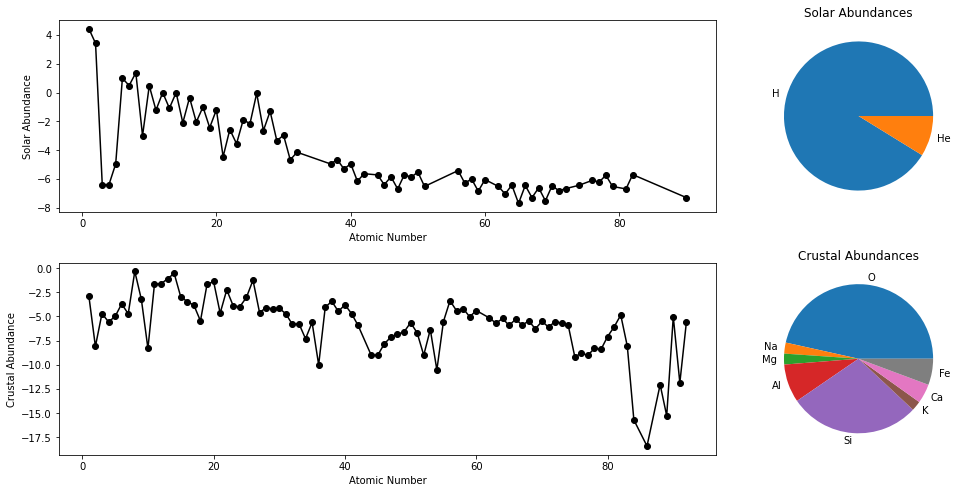

In [24]:
# Setting up the grid

# Plot a figure with a 16 by 8 canvas size.
plt.figure(figsize=(16, 8))

# Plot a grid with 16 spaces by 8 for a plot. Have a gap size of 5 between each subplot.
Grid = plt.GridSpec(8, 16, wspace=5, hspace=5)

# Creating the Line plot for the solar abundance
# This next line says that the box for our plot will go from 0 to 4 in the plot's y coordinates 
# and 0 to 12 in the plot's x coordinates
# We call this axis that we're going to plot onto "line_solar"
line_solar = plt.subplot(Grid[0:4, 0:12]) 

# Plot the line graph onto our new canvas
line_solar.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'k-') # Plot the line
line_solar.plot(Solar.AtomicNumber, np.log10(Solar.Solar), 'ko') # Plot the dots
line_solar.set_xlabel('Atomic Number')
line_solar.set_ylabel('Solar Abundance')

# Now let's add the pie chart axis, this will go from spaces 0 to 4 in the y axis and 12 to 16 on the x axis
pie_solar = plt.subplot(Grid[0:4, 12:16])

# Now we're going to make the pie chart for the solar abundances the same way we did in the above part
TopSolar = Solar[Solar.Solar > 100] # > 100 because the top two elements are so much larger than anything else
totalSolar = TopSolar.Solar.sum() # sum for normalizing
NormalizedSolar = TopSolar.Solar/totalSolar # normalize
symsSolar = TopSolar.Symbol.tolist()

# Plot onto our pie_solar axis
pie_solar.pie(NormalizedSolar, labels=symsSolar)
pie_solar.set_title('Solar Abundances')

# Now let's do the same thing for the line plot for crustal abundances
line_crust = plt.subplot(Grid[4:8, 0:12])
line_crust.plot(Crust.AtomicNumber, np.log10(Crust.Crust), 'k-')
line_crust.plot(Crust.AtomicNumber, np.log10(Crust.Crust), 'ko')
line_crust.set_xlabel('Atomic Number')
line_crust.set_ylabel('Crustal Abundance')

# And the same for the pie chart
pie_crust = plt.subplot(Grid[4:8, 12:16])
pie_crust.pie(Normalized, labels=syms);
pie_crust.set_title('Crustal Abundances');

With `GridSpec`, we can make some very unusual layouts, for example, if we wanted to swap the pie chart for the crustal abundances to the left, but leave the one for the solar abundances on the right. To do this we would make our pie chart coordinates `[4:8, 0:4]` and our line chart coordinates `[4:8, 4:16]`. As a general rule, subplots are useful if you just want to divide your plot into equal parts the same shape. `Gridspec` is useful when you want to make a more complicated plot layout.

### Side note

You have noticed in this lecture that we are using a slightly different notation to indicate methods, e.g. we are writing
```python
DataFrame.dropna()
```
rather than just
```python
.dropna()
```
or `dropna()`. The notation should be interpretted as
```python
className.method()
```
This notation is intended to be make it more clear _which_ object the method is related to without reference to a specific variable name.

In many previous lectures we typically explored one object at a time, and this it was more obvious which methods to the object belonged to (refer back to the NumPy material). However with pandas we have to be slightly more careful, mainly because `Series` and `DataFrame` often define the same method on both objects.